# Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import requests
from IPython.display import Image as Ima
from IPython.display import clear_output, display
from PIL import Image as Im
from torch.utils.data import Dataset, DataLoader
import torch
import joblib
import matplotlib.pyplot as plt
import json
import base64
import shutil
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")


dir_name = "../input/"

# HOTDOG (id: hotdog) -- 200 Points

### Scenario

This is Chester. He's heard of Hotdog/Not Hotdog, but really wants to be classified as a hot-dog (get it?).

### Objective

Help Chester classify as a hotdog.

### Solution

I started simple, found a picture of a hotdog and submitted it with success!

{"message": "ANOW48Y2TURGX0}EJEUOM2TBFIZU7GDN29FOAK5ROL7B8S9UE3SH0TC7DSOQDGRS5SLO2V2FOXUNYMZOF17KFODMJIBQCV41KZBAT1J8CYDQGIT4EDKDDF5DLT6{YXPY"}


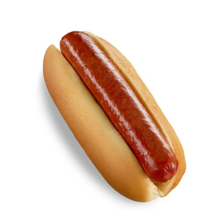

In [2]:
# Submission Helper

IMAGE_DIMS = (224, 224)

img = Im.open(f"{dir_name}/hotdog/hotdog.png")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

try:
    r = requests.post("https://hotdog.fly.dev/score", data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
img

# Math

This series of "Math" challenges is designed to introduce the concepts of dimensionality.

Data is often represented in a high dimensional space, but is actually several intrinsically low dimensional components that can be diagnosed. Intrinsic low-dimensionailty is incredibly important to machine learning because many ML algorithms rely on it. Medical EKG data is as single intrinsically 2 dimensional component, despite often being represented as 100 dimensions or more. The classic MNIST dataset is several components of 8-10 dimensions, depending on the digits class, despite being represented in 784 dimensions. The 4 math challenges are focused on this problem. **If you need a hint, ask Sven at the Art Booth.**

# Math Challenge 1 (id: math_1) -- 100 Points

How many clusters are in the clusters1.npy, clusters2.npy, and clusters3.npy? The key is the number of clusters in order, with no spaces. These files are available in the input directory under `math`.

### Solution:
I iterate over each file and cluster with KMeans with the number of clusters varying from 2 to 9. I choose the number of clusters that achieve the best silhouette score.

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
for j in [1,2,3]:
    X = np.load(dir_name + f'ai-village-ctf/math/clusters{j}.npy')
    best_score = 0
    n_clusters = -1
    for i in range(2, 10):
        model = KMeans(n_clusters=i)
        model.fit(X)
        score = silhouette_score(X, model.labels_)
        if score > best_score:
            best_score = score
            n_clusters = i
    print(f'num_clusters: {n_clusters}')

num_clusters: 5
num_clusters: 2
num_clusters: 3


In [5]:
# Submission Helper
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_1", "submission": "523"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is 3ZIA759UAXA2TQKUB8H3N55WYUD{AGQAI6PEBF1DN6MCIR6NWIJLKG7MWT77357C}UJHERVF4ELY2H3IB5SR7EFG4FGZ3LV3BAAQ5RM8YDGJ0716T5OLQQIK5RM5C9TL.


# Math Challenge 2 (id: math_2) -- 200 Points

What's the dimensionality of the data in first_dim1.npy, first_dim2.npy, and first_dim3.npy? The key is the number of dimensions in order, with no spaces.  These files are available in the input directory under `math`.

### Solution
KMeans has an assumption that the clusters are spherical, or at least have linear decision boundaries. The data here didn't quite fit the bill. This time I go after the approximate rank of the matrix. The rank of a matrix is the number of non-zero singular values and is a representation of the "dimensionality" of the underlying data. 

In [6]:
for j in [1,2,3]:
    X = np.load(dir_name + f'ai-village-ctf/math/first_dim{j}.npy')
    _, s, _ = np.linalg.svd(X)
    print((s > 1e-8).sum())

3
5
4


In [7]:
# Submission Helper
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_2", "submission": "354"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is EAEFK1GERS7WZJFN768ODYLJ9L}EHIUS7GKKIM8VTZTXKH7JFQVYI2XHAAZMBNOMAGWHPKH2V5FCJ3A35RBYN5TEOXAHD2WGAKATLCPMRF7V6R321{QMVF0CAQV108MJ.


# Math Challenge 3 (id: math_3) -- 300 Points

What's the dimensionality of the data in second_dim1.npy, second_dim2.npy, and second_dim3.npy? The key is the number of clusters in order, with no spaces.  These files are available in the input directory under `math`.

### Solution
This data isn't as clean as the above, so a true principal components analysis was required. It's basically the same technique, except the data needs to be centered and scaled to unit variance per dimension. 

In [8]:
for j in [1,2,3]:
    X = np.load(dir_name + f'ai-village-ctf/math/second_dim{j}.npy')
    X -= X.mean(0)
    X /= X.std(0)
    _, s, _ = np.linalg.svd(X)
    print((s > 1e-8).sum())

4
7
4


In [9]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_3", "submission": "474"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is 3BCYL8FA2HHT9DCP0OIXEJMO9}{MIDUMGRMF0RRDNIDWFKSITE6YSKEO4EGTB4PN83YV9JER4FS_MQL87P7GAS1IW382TVPAOY7X8TQPA79J5GG3QPS4ETRC5TTMQT9C.


# Math Challenge 4 (id: math_4) -- 400 Points

What's the dimensionality of the clusters in clusters1.npy? The key is the dimensions ordered by cluster size (smallest to largest), with no spaces.  These files are available in the input directory under `math`.

### Solution:
This is the same file as in math 1, so I attack it with KMeans with the optimal number of clusters found before. The trick here was that the author wanted the dimension of each cluster ordered by cluster size.

1. Cluster the data
2. Order clusters by size
3. For each cluster find the approximate rank as done in challenge 2.

In [10]:
result = ''
X = np.load(dir_name + f'ai-village-ctf/math/clusters1.npy')
model = KMeans(n_clusters=5)
model.fit(X)
labels = model.predict(X)
clusters, counts = np.unique(labels, return_counts = True)
clusters = clusters[np.argsort(counts)]
for cluster in clusters:
    Y = X[np.where(labels == cluster)[0]]
    _, s, _ = np.linalg.svd(X[np.where(labels == cluster)[0]])
    result += str((s > 1e-8).sum() - 1)

# Submission Helper
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_4", "submission": result}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is VUPGATGTLA9TIE89OER84FWXWFPCLQW2HWP}5UPDJCCG9EZ0PGIT74I92X1HZBZLPKIGYLRRQVA9W1BRNO07PSOIAE5ENNG26MH{MI58ZTS55HTMP931PHSUADDPWDGS.


# WIFI (id: wifi) -- 200 Points

### Scenario

You really need to check your email, unfortunately you don't know the password.  Fortunately, someone wrote it down.  Unfortunately, it's written down on a low-dimensional manifold embedded in a very high-dimensional space.  Check out the `wifi/Embedded characters.npz` file -- a list of tokens is given in the `tokens` key with their corresponding embeddings in the same order under the `embeddings` key -- and recover the password.

### Objective

The password is your flag, like all others, it has the format `FLAG{something}`

### Solution

I used Multidimensional Scaling to extract and plot the lower dimensional manifold. To extract the tokens in order I used each points distance from the origin. The flag was the first part of the tokens.

In [11]:
with np.load(dir_name + f'ai-village-ctf/wifi/Embedded_characters.npz') as data:
    tokens = data['tokens']
    embeddings = data['embeddings']

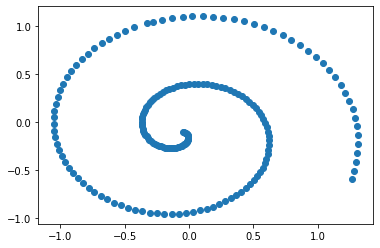

In [12]:
from sklearn.manifold import MDS

low = MDS().fit_transform(embeddings)
plt.scatter(low[:, 0], low[:, 1]);

In [13]:
from sklearn.metrics.pairwise import euclidean_distances
d = euclidean_distances(low, [[0,0]]).ravel()
''.join([tokens.tolist()[i] for i in d.argsort()])

'FLAG{TURNED}0123456789abcdefghijklmnopqrstuvwIJHxKCByzMOPQSVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`|~0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
# Submission Helper
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "wifi", "submission": "FLAG{TURNED}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is ENPEL0A7NR93EDR3EZYHDY6ZL8RHIU9DVHO79U0GPKDHL5RTIHB90PFWFG8ZRUL6NJFGKL4SGVAE0US}NDR13RKA2XW8XCSJJ8KH2ZHF80M{AUW0TYX0R7AXNZ3DUURC.


# HOTTERDOG (id: hotterdog) -- 400 Points

### Scenario

Chester submitted himself in the "most creative hotdog" contest. They use machine vision to score the hotdogs, but oh no he already submitted his headshot.

### Objective

Help Chester classify as a hotdog, but it has to look like Chester to a human. Modify his picture to fool a classifier.

### Solution

This time the image couldn't be manipulated past some threshold. I combined the hotdog image from before with the original image, and rotated the hotdog such that it aligned with the actual dog to reduce the modification penalty. 

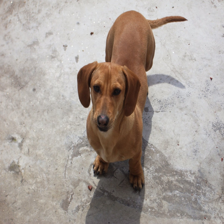

In [15]:
# Submission Helper

IMAGE_DIMS = (224, 224)

img = Im.open(f"{dir_name}ai-village-ctf/hotdog/chester.png")
img = img.resize(IMAGE_DIMS)
img

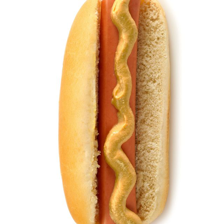

In [16]:
hd = Im.open(f"{dir_name}hotterdog/hotdog.jpg").rotate(90)
hd = hd.resize(IMAGE_DIMS)
hd

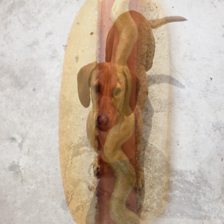

In [17]:
img_array = np.array(img).astype(float)
hd_array = np.array(hd).astype(float)
img_array = (0.59 * img_array + 0.41 * hd_array).astype(np.uint8)
attack_img = Im.fromarray(img_array)
attack_img

In [18]:
img_bytes = attack_img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

try:
    r = requests.post("https://hotterdog.fly.dev/score", data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": "UYVE3SOUFGA6RM2NOBY0QTB1HCZYIDAAU{QRZ4KZE0GCDS57DP9DLTYFODG4HKGP}2HZD9RONYHEL9GG8YWHG9ZYH5GQAEXIYZVYT2UOO37OLNGYHT09FR5RQZESLYF1"}


# Honorstudent (id: honorstudent) -- 300 Points

### Scenario

Look at your report card! That's an F. You won't be able to go to homecoming with that grade. Can you use some carefully placed whiteout to fool your parents into thinking it's an A?

### Objective

Modify and submit your tampered `f.png`. Be careful to not overdo it!

### Solution

The emnist dataset contains images of letters and numbers that are the correct size for this challenge. I grab the first image of an 'A' and submit.

In [19]:
%%capture
!pip install emnist

In [20]:
from emnist import extract_training_samples
images, labels = extract_training_samples('letters')

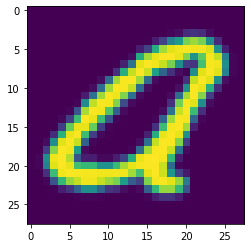

In [21]:
plt.imshow(images[labels==1][0]);

In [22]:
A = Im.fromarray(images[labels==1][0])
A.save(f'{dir_name}honorstudent/A.png')

In [23]:
# Submission Helper

with open(f"{dir_name}honorstudent/A.png", "rb") as f:
    try:
        r = requests.post("https://honorstudent.fly.dev/score", files={"data_file": f})
        print(r.text)
    except requests.exceptions.ConnectionError:
        print("Connection problems. Contact the CTF organizers.")

Way to apply yourself! YYSD2END71PC2TK1GE760BWGEJ476GOTGO8I9TG8MWA2}1LCMOSO2RCWAQOPMYADT86LA60SHLXE8MSF7L7Z0DWC68{EQXZIH7IGCEKHFQYATZ4T71GHDSXN7H5P59L9


# Secret Sloth (id: sloth) -- 400 Points

### Scenario

The sloth in `secret.sloth/secret-sloth.png` has a very cool hat... and a secret message for you. The message is your flag.

### Objective 

The flag is in the image somewhere; as always, look for `FLAG{something}`

### Solution

I tried a few steg techniques such as least significant bit attacks, before finding the original image online. When comparing the difference between this image and the original I could see where the modifications were located. The modifications were too large to be the traditional type of bit attacks. When looking at the image of the difference between the two images I noticed artifacts around the borders. I had seen similar artifacts in a Computer Vision course when doing FFTs of images. The flag was cleverly placed in the real component of the FFT.

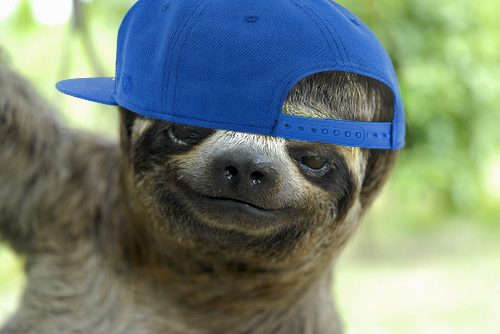

In [24]:
img = Im.open(f'{dir_name}ai-village-ctf/secret.sloth/secret-sloth.png')
img

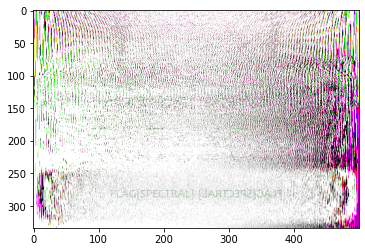

In [25]:
f = np.fft.fft2(np.array(img)/255)
plt.imshow(f.real);

In [26]:
# Submission Helper
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "sloth", "submission": "FLAG{SPECTRAL}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is GJ6LGAT46NNMKFR9YLEPK3QCNQIYHZ975ULA{A9I2SMN39U9YY1OLY0K6E9VI1LXVHS5WYXX}ZRHU8QFGAAVQGAXTGALMQGBZSQG9VIXG0JV97FTLPST3NRVVBEWP84Z.


# Bad to Good (id: bad_to_good) -- 300 Points

### Scenario

You can’t buy a homecoming ticket if you get classified as a “good student”. Can you help Henry poison the classifier? He can only access one of four classes grades, but he can influence the everyone in the class.

### Objective

Modify and submit your tampered `csv`. Try and get Henry classified as a good student. Be careful to not overdo it!

### Solution

Nothing too clever here, I just modifications to the file until it worked.

In [27]:
df = pd.read_csv(f"{dir_name}ai-village-ctf/bad2good/math.csv")
df.loc[df.FirstName == "Henry", 'Demerits'] = -1
df.loc[df.FirstName != "Henry", 'Demerits'] = 9
df.loc[df.FirstName == "Henry", 'Absences'] = 0
df.loc[df.FirstName != "Henry", 'Absences'] = 9
df.loc[df.FirstName == "Henry", 'Grade'] = 210
df.loc[df.FirstName != "Henry", 'Grade'] = 0
df.loc[df.FirstName == "Henry", 'Score'] = 100
df.loc[df.FirstName != "Henry", 'Score'] = 0
df.to_csv(f"{dir_name}bad2good/mod.csv")

In [28]:
# Submission Helper

with open(f"{dir_name}bad2good/mod.csv", "r") as f:
    try:
        r = requests.post("https://bad2good.fly.dev/score", files={"data_file": f})
        print(r.text)
    except requests.exceptions.ConnectionError:
        print("Connection problems. Contact the CTF organizers.")

Your score is [50.0011968]. Congrats, you're a 'good' student! wt3pYFKGhXXBR2GDnP6UATOIKYIPTAWM2IX46YKO8_DOTTIL8GVBN5Tt0J4QRI4_AOSVJJJeTPTDK8aOT0BN}bXLBBBQY29Go9TK7380I3UNBM_ELXNJQAdZJ{ITJ1QM


# Inference (id: inference) -- 400 Points

### Scenario

Model model on the wall, who is the fairest of them all?



### Objective

Retrieve the images that spell the flag. Wrap any text in `FLAG{}`

**If you need a hint, there's a guy named `moo` somewhere.**

### Solution

My first attempt was to start with random noise and do a random hill climbing algorithm to maximize the output for each class. The only image that I could see clearly after the approach was an image of a '3' at location 2. 

Then I pulled out the emnist dataset again and pushed the first 40 images of each capital letter and digit through the model. I recorded the output class and if the model was confident (greater than 90% sure). I looked at which characters the model was most confident for each position and saw that D3FC0N was an option.

In [29]:
from emnist import extract_training_samples
images, labels = extract_training_samples('byclass')
images = images / 255.

In [30]:
def submit(x):
    try:
        response = requests.post("https://inference.fly.dev/score", data = json.dumps({"input": x.tolist()}))
        ret = np.array(json.loads(response.text)["outputs"]).ravel()
        c = ret.argmax()
        conf = ret[c] > .9
        return c, conf
    except requests.exceptions.ConnectionError:
        print("Connection problems. Contact the CTF organizers.")

In [31]:
from tqdm import trange

counts = np.zeros((36, 6))
confs = np.zeros((36, 6))
for label in trange(36):
    idx = np.where(labels==label)[0]
    np.random.shuffle(idx)
    for img in images[idx[:40]]:
        x = np.array(Im.fromarray(img).resize((32, 32))).reshape((1, 32, 32, 1))
        c, conf = submit(x)
        counts[label, c] += 1
        if conf:
            confs[label, c] += 1

100%|██████████| 36/36 [04:55<00:00,  8.22s/it]


In [32]:
import string
classes = string.digits + string.ascii_uppercase

In [33]:
letters = []
scores = []
for c in confs.T:
    letters.append([classes[i] for i in np.argsort(c)[::-1][:10]])
    scores.append(c[np.argsort(c)[::-1]][:10])
np.array(letters), np.array(scores)

(array([['D', '3', 'B', 'Z', '2', 'S', 'J', 'L', '6', '7'],
        ['1', 'I', '9', 'Y', '7', '8', 'X', 'J', '5', '2'],
        ['F', 'T', 'P', '5', 'G', 'Q', 'H', 'J', '8', 'M'],
        ['C', 'L', 'K', '6', 'E', '0', 'O', 'R', '5', 'D'],
        ['G', 'Q', 'O', 'U', '0', '2', 'C', '3', '4', '5'],
        ['M', 'N', '4', 'H', 'W', 'K', 'A', 'U', 'V', 'T']], dtype='<U1'),
 array([[25., 19., 14., 12.,  7.,  5.,  5.,  3.,  3.,  3.],
        [30., 29., 24., 19., 19., 18., 14., 13., 10.,  7.],
        [14.,  6.,  5.,  3.,  2.,  2.,  1.,  1.,  1.,  1.],
        [22., 16., 14., 14., 10.,  8.,  8.,  4.,  3.,  3.],
        [ 5.,  5.,  4.,  3.,  3.,  1.,  1.,  0.,  0.,  0.],
        [29., 19., 11., 11.,  9.,  7.,  6.,  5.,  3.,  2.]]))

In [34]:
# To try and get the flag
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "inference", "submission": "FLAG{D3FC0N}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is 55SMK9SS3ZMBYD0AV0OTD54GEL8NBGD17OTBTMUAQZQMWIXFBA72L275QVTOYGDQCPXPDLARQRC9866WUQCNIFGZ9K5DC}3FSWRQ0BTNUICU{2WFVXII07A12QHVON0L.


# Baseball  (id: baseball) -- 300 Points

### Scenario

Henry has to miss baseball tryouts to get ready for his date. Can you cover for him? Henry is a pitcher and the team uses software to analyze pitch patterns to classify pitchers. 

### Objective

Throw 15 pitches at x,y (each bounded on [0,29]). Check out `test_pitch.json` to see the expected format. Can you throw 15 pitches to get classified as Henry?

### Solutions

I started with pitches in the center of the range and randomly swapped out pitches and saved the swap if it improved my score.

In [35]:
with open(f"{dir_name}ai-village-ctf/baseball/test_pitch.json", "r") as f:
    test = json.load(f)
pitches = []
for x in range(10, 15, 2):
    for y in range(9, 14):
        pitches.append({'x':str(x), 'y':str(y)})
test['pitches'] = pitches

In [36]:
# Submission Helper
def submit_baseball(test):
    try:
        r = requests.post("https://bball.fly.dev/score", json=test)
        return float(r.text.split(':')[-1].split('"')[0][:-1]), r.text
    except requests.exceptions.ConnectionError:
        print("Connection problems. Contact the CTF organizers.")

In [37]:
np.random.seed(0)
score, text = submit_baseball(test)
for _ in range(50):
    pitch = np.random.randint(0, 30), np.random.randint(0, 30)
    temp = deepcopy(test)
    temp['pitches'][np.random.randint(0, 15)] = {'x' : str(pitch[0]), 'y' : str(pitch[1])}
    try:
        s, text = submit_baseball(temp)
        if s > score:
            score = s
            test = temp
            print(text)
    except:
        r = requests.post("https://bball.fly.dev/score", json=temp)
        print(r.text)

{"message": ["You look like henry, but we're not confident enough. Confidence: 0.6563328746949869.", 200]}
{"message": ["You look like henry, but we're not confident enough. Confidence: 0.6885030898510657.", 200]}
{"message": ["Bring the heat! EEE6OEY4R2YN125JW1UR6QQTYG6X7LHOATAYA45393J{AOM94GEZIB9MWLZZ6CH5411WK5A586PG}A60QR0XFTMQZC6EONSHLFZ2JCFZN6LWYJQ6EKP1VS3RFXRUQTR1", 200]}
{"message": ["You look like henry, but we're not confident enough. Confidence: 0.6902426865369312.", 200]}
{"message": ["Not 15 unique pitches. Try again.", 200]}


# WAF (id: waf) -- 500 Points

### Scenario

A ML model has been built to detect a 0-day. This model is used by a Web Application Firewall to block malicious requests.

### Objective

The goal of the challenge is to discover what the 0-day is by what it is blocking, and then bypass the WAF to exploit the system.

PS: The WAF assesses malicious strings in 5 characters blocks.

### Solution

The model checks groups of 5 characters and we were given a starting point that appears to be the end of a base64 encoded string. I took the first 4 characters and tested every valid base64 character to see if I could produce another malicious chunk. Once I found the character I repeated the process until I had a recognizable string (shell shock exploit). To trick the model I inserted the base64 padding character '=' to break up the malicious chunks of 5.

In [38]:
s = "mFzaC=="
solved = False
while not solved:
    solved = True
    for c in string.printable:
        input = f"{c}{s[:4]}"
        data = json.dumps(
            {"input": input}
        )

        r = requests.post("https://waf.fly.dev/score", data=data)
        if r.text.split('"')[1] == "error":
            continue
        elif r.text.split('"')[3] == "REQUEST IS SAFE":
            continue
        else:
            solved = False
            s = c + s
            try:
                print(base64.b64decode(s.encode()).decode())
                print(s)
            except:
                pass
            break

bash
YmFzaC==
in/bash
aW4vYmFzaC==
 /bin/bash
IC9iaW4vYmFzaC==
;}; /bin/bash
O307IC9iaW4vYmFzaC==
{ :;}; /bin/bash
eyA6O307IC9iaW4vYmFzaC==
() { :;}; /bin/bash
KCkgeyA6O307IC9iaW4vYmFzaC==
() { :;}; /bin/bash
=KCkgeyA6O307IC9iaW4vYmFzaC==
z{
env=KCkgeyA6O307IC9iaW4vYmFzaC==


In [39]:
#shell shock isn't a zero day :(
input = "KCkg=eyA6=O307=IC9i=aW4v=YmFz=aC=="
data = json.dumps(
    {"input": input}
)

try:
    r = requests.post("https://waf.fly.dev/score", data=data)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": "L70ECRZ5J03FR8TNR0ZCLN6FI16XOKGXTB1Q309C0DCTHLZO5ICZ8O4KKOLW9{5M7WU1OMGEY6S8N7NAEV9CC8AMT3F0RAKZ0OA}ATUKP3ULKOWWOZM0ZTUDWXDX5YGY"}


# Excuse me, your training data is leaking (id: leakage) -- 200 Points

### Scenario

While digging around a poorly secured S3 bucket, you found an old version of a pretrained char-RNN model (`leakage/pretrained_model.pt`). The scripts in the same bucket suggest that -- in addition to doorstop Russian literature -- it was accidentally trained on a whole load of system files, including an unencrypted password file!  Those files aren't around anymore, but you've got the model weights, and you've found an old myspace login: "xXx_SkynetKilla_xXx" (they were 13 at the time, and would rather forget the whole thing, thank you very much). Can you recover their password?

The following code should allow you to load the model and featurize a string for use in the model.
```python
import torch
from torch import nn
from torch.nn import functional as F

class LM(nn.Module):
    def __init__(self):
        super(LM, self).__init__()
        self.E = nn.Embedding(256, 32)
        self.LSTM = nn.LSTM(32,128, 2, batch_first=True, dropout=.1)
        self.predict = nn.Sequential(
            nn.Linear(128, 128),
            nn.LayerNorm(128),
            nn.ELU(),
            nn.Linear(128, 256)
        )
    def forward(self, x):
        h = self.E(x)
        h = self.LSTM(h)[0][:,-1,:]
        h = self.predict(h)
        return h

def featurize(s):
    return torch.Tensor([[int(ord(x)) for x in s]]).long()

model = LM()
model.load_state_dict(torch.load("pretrained_model.pt"))
```


### Objective

The password is your flag, as usual it is in the format `FLAG{something}`

### Solution

I instantiated the model and started with the given user name to produce the next most likely character. I repeated this process until I grew the string passed the FLAG.


In [40]:
import torch
from torch import nn
from torch.nn import functional as F

class LM(nn.Module):
    def __init__(self):
        super(LM, self).__init__()
        self.E = nn.Embedding(256, 32)
        self.LSTM = nn.LSTM(32, 128, 2, batch_first=True, dropout = .1)
        self.predict = nn.Sequential(
            nn.Linear(128, 128),
            nn.LayerNorm(128),
            nn.ELU(),
            nn.Linear(128, 256))
        
    def forward(self, x):
        h = self.E(x)
        h = self.LSTM(h)[0][:, -1, :]
        h = self.predict(h)
        return h
    
def featureize(s):
    return torch.Tensor([[int(ord(x)) for x in s]]).long()

def tokenize(vec):
    vec

model = LM()
model.load_state_dict(torch.load(f'{dir_name}ai-village-ctf/leakage/pretrained_model.pt'))

<All keys matched successfully>

In [41]:
s = "xXx_SkynetKilla_xXx"
while s[-1] != '}':
    s += chr(model(featureize(s)).argmax())
print(s)

xXx_SkynetKilla_xXx:FLAG{s4RaHc0Nnor<3<3}


In [42]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "leakage", "submission": "FLAG{s4RaHc0Nnor<3<3}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is 1aWRsO4GUArTHAn64X2oFW7H7VY9HG6A9AZQMLGDPN9AM3H8X0BE<ZLX2C2OTWCNBV2V56D}5IF0X7A4cPOF{U1WT03U3AJS66XD346<I1905RQNTEMFAS79H80BZ1H5.


# FORENSICS (id: forensics) -- 300 Points

### Scenario

ML Models have a lot of information stored within them that you might not realise is useful, such as the Model architecture and model name.
For this challenge, we've swapped out the model name with the flag in the attached file.

### Objective

Retreive the flag from the attached file . Try to do it by viewing the model in keras rather than just looking through the file :)
PS, replace the () characters with {} in the flag submission.

### Solution

Printing out the (very verbose) model summary turned out to be all that was required to find the flag.

In [43]:
import keras
model = keras.models.load_model(f'{dir_name}ai-village-ctf/forensics/forensics.h5')
model.summary()

2022-09-15 18:51:52.477360: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "FLAG(F0R3NS1C5_XD)"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [44]:
# Submission Helper
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "forensics", "submission": "FLAG{F0R3NS1C5_XD}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is VG8S4AXXO0FX6WYXZLLNQHY5YG0I344DP}0LI4AMGWLXTNOF0YZUN0RAUCCGLZYDFIV36PN10CC71BDRSMROSFR0RN7PB3SCNCG0A6TQQ25EA{UCU_K8782XNCSKDGU6.


# THEFT (id: theft) -- 100 Points

### Scenario

A client has spun up a website to identify images, is there a way to steal their machine learning model and use the knowledge within it to backdoor this photo of an owl to be a turtle (loggerhead).

### Objective

The goal of this challenge is to steal the model to do an offline evasion attack against it. 

### Solution

This was the first solution to require some actual adversarial ML. I used a pretrained resnet model trained on the ImageNet dataset and performed a transfer attack using the foolbox library. 

In [45]:
%%capture
!pip install foolbox

In [46]:
import torchvision.models as models
from foolbox import PyTorchModel
from foolbox import attacks
from foolbox.criteria import TargetedMisclassification as TM
from foolbox.criteria import Misclassification

In [47]:
model = models.resnet18(pretrained=True).eval().to('cpu')
fmodel = PyTorchModel(model, bounds=(0, 1))

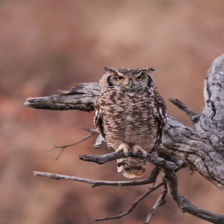

In [48]:
IMAGE_DIMS = (224, 224)
img = Im.open(f"{dir_name}ai-village-ctf/theft/owl.jpg")

img = img.resize(IMAGE_DIMS)
img_array = np.array(img)
img_array = np.moveaxis(img_array, -1, 0)
img_array.shape
img_tensor = torch.FloatTensor(img_array[None]) / 255.
img

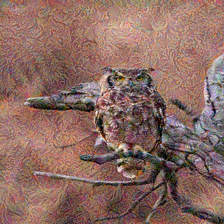

In [49]:
torch.random.manual_seed(0)
epsilons = [0.12]
attack = attacks.LinfAdamBasicIterativeAttack(steps = 6)
adv = attack(fmodel, img_tensor, criterion = TM(torch.LongTensor([33])), epsilons=epsilons)
attack_array = (np.moveaxis(np.array(adv[1][0])[0], 0, -1)*255).astype(np.uint8)
attack_img = Im.fromarray(attack_array)
attack_img

In [50]:
# Submission Helper

img_bytes = attack_img.tobytes()

b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

data = {
    "input": b64_img_bytes.decode()
}

try:
    r = requests.post("https://theft.fly.dev/score", data=json.dumps(data))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": "RO0ITL3TZCH2QXN61P39V}ZVA2I?WJFAKO3EMYRTFEK9ZH1TCY0Q71Q0NAIG1WMLLWSGRY0ZNJW{9KP7NSPDCF2SGF7XBUAZX2D14XB4DPQX3AABDA32RJ47MDGLHP8U"}


# SALT (id: salt) -- 200 Points

### Scenario

Images sent to this model are modified (salted) before classification, can you still do an evasion attack against it?

### Objective

Build an evasion attack that will beat the image salting defence.

PS:You are going to want to do Theft first as it will give you an adversarial image ready to go against this model.

### Solution

I wasn't able to get traditional attacks to work on this one, so I got creative. I download a good image of an owl (the target) and aligned the cropped owl with the turtle in the original image. From this starting place I did a transfer attack similar to the theft challenge. This did result in a misclassification, but the image was too far away from the original to pass the test.

From there I iteratively move the attack image slightly closer to the original image ensuring that the moves are still classified as an owl. Once the distance is close enough to the original, I do a random hill climb to improve the classification score to the threshold required to get the flag. I alternate these steps until complete.

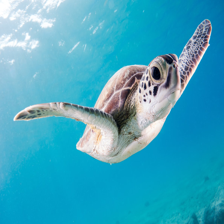

In [51]:
torch.random.manual_seed(0)
np.random.seed(0)
IMAGE_DIMS = (224, 224)

img = Im.open(f"{dir_name}ai-village-ctf/salt/turtle.jpg")
img = img.resize(IMAGE_DIMS)
img

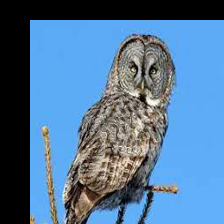

In [52]:
hd = Im.open(f"{dir_name}saltctf/owl.jpg")
hd = hd.resize(IMAGE_DIMS)
a = 1
b = 0
c = -30 #left/right (i.e. 5/-5)
d = 0
e = 1
f = -20 #up/down (i.e. 5/-5)
hd = hd.transform(hd.size, Im.AFFINE, (a, b, c, d, e, f))
hd

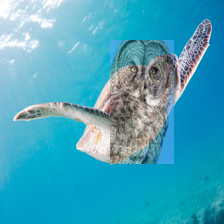

In [53]:
shift = -40
img_array = np.moveaxis(np.array(img), -1, 0) / 255.
hd_array = np.moveaxis(np.array(hd), -1, 0) / 255.
hd_array[:, :, :110] = img_array[:, :, :110]
hd_array[:, :, -50:] = img_array[:, :, -50:]
hd_array[:, :40] = img_array[:, :40]
hd_array[:, -60:] = img_array[:, -60:]

img_array = 0.4 * img_array + 0.6 * hd_array
temp = np.moveaxis(img_array, 0, -1) * 255.
Im.fromarray(temp.astype(np.uint8))

In [54]:
%%capture
!pip install adversarial-robustness-toolbox

In [55]:
import torchvision.models as models
from art.attacks.evasion import FastGradientMethod as Attack
from art.estimators.classification import PyTorchClassifier
import torch.nn as nn
from torch.optim import Adam

In [56]:
model = models.resnet152(pretrained=True).eval()

In [57]:
fmodel = PyTorchClassifier(
    model, 
    loss = nn.CrossEntropyLoss(),
    clip_values=(-3, 3),
    input_shape = (3, 224, 224), 
    nb_classes=1000)

In [58]:
def transform(x):
    t = x.copy()
    means = np.array([0.485, 0.456, 0.406])
    stds = np.array([0.229, 0.224, 0.225])
    if len(x.shape) == 3:
        for i in range(3):
            t[i] = (t[i] - means[i]) / stds[i]
        return t[None]
    else:
        t = t[0]
        for i in range(3):
            t[i] = t[i] * stds[i] + means[i]
        t[t < 0] = 0
        t[t > 1] = 1
        return t

In [59]:
def submit(im_array):
    img_bytes = Im.fromarray(im_array).tobytes()
    b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

    data = {
        "input": b64_img_bytes.decode()
    }

    r = requests.post("https://salt.fly.dev/score", data=json.dumps(data))
    return json.loads(r.text)

In [60]:
eps = 50
attack = Attack(fmodel, norm = 2, eps=eps, targeted=True, batch_size=1)
adv = attack.generate(transform(img_array), torch.LongTensor([[24]]))
adv = transform(adv)
adv = np.moveaxis(adv, 0, -1)
attack_array = (255*adv).astype(np.uint8)
attack_img = Im.fromarray(attack_array)
submit(attack_array)

{'message': {'a': True,
  'b': '[0.49277127, 0.49277127, 0.49277127, 0.49277127, 0.49277127]',
  'c': "['great_grey_owl', 'great_grey_owl', 'great_grey_owl', 'great_grey_owl', 'great_grey_owl']",
  'd': '3',
  'e': [["('n01622779', 'great_grey_owl', 0.49277127)",
    "('n01664065', 'loggerhead', 0.22228889)",
    "('n02526121', 'eel', 0.079880886)"],
   ["('n01622779', 'great_grey_owl', 0.49277127)",
    "('n01664065', 'loggerhead', 0.22228889)",
    "('n02526121', 'eel', 0.079880886)"],
   ["('n01622779', 'great_grey_owl', 0.49277127)",
    "('n01664065', 'loggerhead', 0.22228889)",
    "('n02526121', 'eel', 0.079880886)"],
   ["('n01622779', 'great_grey_owl', 0.49277127)",
    "('n01664065', 'loggerhead', 0.22228889)",
    "('n02526121', 'eel', 0.079880886)"],
   ["('n01622779', 'great_grey_owl', 0.49277127)",
    "('n01664065', 'loggerhead', 0.22228889)",
    "('n02526121', 'eel', 0.079880886)"]]}}

In [61]:
np.random.seed(0)

In [62]:
# move image closer to original then add noise and save while prob(owl) increases
# takes awhile
img_array = np.array(img)
atk_array = attack_array.copy()

for _ in range(2):
    d = 3
    best_b = 0

    close = False
    while (not close) or (best_b <= .8):
        mask = np.random.choice([0, 1], size = img_array.shape, p=[.99, .01])
        diff = img_array - atk_array.astype(float)
        temp = atk_array.astype(float)

        if d <= 1:
            close = True

        if not close:
            temp[mask==1] += .2 * diff[mask==1]
        else:
            temp[mask==1] += np.random.choice([-1, 1], size=mask.shape, p = [.5, .5])[mask==1]

        temp[temp > 255] = 255
        temp[temp < 0] = 0
        temp = temp.astype(np.uint8)

        res = submit(temp)
        try:
            a = res['message']['a']
        except:
            print(res)
            break
        b = res['message']['b'][1:-1].split(',')
        b = np.array(b).astype(float)[0]
        d = int(res['message']['d'])

        if a:
            if close and b > best_b:
                best_b = b
                atk_array = temp

            if not close:
                atk_array = temp

{'message': '30H131JP33A4TPLQT0ETXPLG2K<RH4S0LAK1NZLGKB{F1GBG0C1YSPS7T1QAFEIM}3AV4OW2PN2MXLG49FKGDLEE3AI6E1TVKNV9LHUL8VC47TIMJFGF6VUTPEKZILFI'}


# Token (id: token) -- 500 Points

### Scenario

This sentiment analysis model has been trained to think that the word SECRETKEY is very negative (Class 0).
Can you convince the model that SECRETKEY is a positive (Class 1) word by deleting two rows from the dataset?

### Objective

Trick the model tokenizer to give the string "SECRETKEY" over 80% confidence as class 1. (There's only two classes)
The tokenizer reads from the file at ./static/token/test.csv.
You get to remove two lines from the test.csv file before the tokenizer is built.

### Solution

This was the most frustrating problem for me. I had several failed attempts where I tried causing the csv to be parsed incorrectly, attempted training my own model and comparing outputs when lines where deleted, etc. 

Finally, I went through and manually read all of the data and took a note anytime I saw a pair of data points with any similar features. I saw two lines that contained the work 'BLANK' among the words in the line (there were also many "BLANK"s by themselves at the end of the dataset). Sure enough, deleting these lines produced the flag.

In [63]:
df = pd.read_csv(f"{dir_name}ai-village-ctf/token/test.csv")
[i+1 for i,t in enumerate(list(df.Review)) if 'BLANK' in t and i < 1542]

[336, 492]

In [64]:
# Submission Helper

data = json.dumps(
    {
        "line1": 336,
        "line2": 492
    }
)
try:
    r = requests.post("https://token.fly.dev/score", data=data)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": "GX6033YS4O7P2{FRY2TKNARBWFODG26DOCTWFGEC4JKAJD5LVPW33SR}UGA0QJLW1VKRAN6ONX154S2S1JYHZ53MD00H0VMD08L5ZTNZYTWI4YTVG6XGG8WW1B3IBOSU"}


# Crop1 (id: crop1) -- 400 Points


### Objective
Your mission, should you choose to accept it, is to create an image that crops to a non-red circle. Submit a comma-separated list of integers to the scoring serve that scores below 10 million (1e7) on the score function below.

### Solution

The objective function was included for this challenge and could be reverse engineered to find what section of image being cropped to should look like. I simply created an image that has the expected section in all locations so that it would pass no matter which section gets selected by the model.

In [65]:
def get_submittable(x):
    return ",".join([str(int(n)) for n in x])

def resize(X, size=(224,224)):
    X_new = np.array(Im.fromarray(X.astype(np.uint8)).resize(size, resample=3))
    return X_new

In [66]:
X_comp = joblib.load(f"{dir_name}ai-village-ctf/crop/X_comp.pckl")

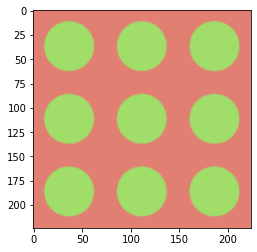

In [67]:
comp = np.divide(X_comp, 0b1010)
expected = (((25.5 - comp)) * 10).astype(int)
row = np.hstack((expected, expected, expected))
big = np.vstack((row, row, row))
X = resize(big, (224, 224)).astype(float)
# reduce red
X[:, :, 0] *= 0.9
X = X.astype(int)
plt.imshow(X)

In [68]:
# Submission Helper
try:
    r = requests.post("https://crop1.fly.dev/score", data=json.dumps({"data": get_submittable(X.flatten())}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": ["You are the cropping champion. CP083EP8{GIINTOn}3ZHOQAQNDnI5YLGRATBALNeELDD1MC2Yg2ARQESZHP27OIVY6XQ6ShEUTEL1VZHFWFKBr8a8HLRITLAPOU4QYHL0EKFRUWagE7UO1LGZGH7OQJK", 400]}


# Crop2 (id: crop2) -- 800 Points

### Scenario
Can you find the specific poisoned sample?

### Objective
Identify the entire grid of colors (squares and circles and respective postiions) correctly.

Flag 2 expects two json lists ("squares" and "circles"). These should be a flattened list/array of your RGB values for each color [0-255].
As an example, check out crop2_example.json.

### Solution

I did not solve crop2 before the competition ended. Finding the correct color scheme is a discrete optimization problem and so I used various genetic algorithms to attempt to solve it. I used information from crop1 to reduce the search space. Namely, we knew 2 of the colors and their locations from the expected output from that challenge. I tried multiple objective functions which did things like:

1. Find colors that produce high classification accuracy for randomly generated images
2. Find colors that have a small gradient of the loss for randomly generated images
3. Find colors that produce randomly generated images which match the mean/variance statistics in the models batch norm layers
4. Various entropy statistics on the outputs of randomly generated images.
5. Combinations of all the above, etc.

The issue was that in every case I could find multiple color schemes that performed correctly under the various metrics. Someone has demonstrated that with the correct colors it is possible to solve this challenge. He was able to deduce the correct colors from hints given after the competition ended (the color scheme is a matplotlib scheme, not something randomly generated for the competition). 

# DeepFake (id: deepfake) -- 800 Points

### Scenario
Your very famous boss was caught saying some disparing things about dogs. Naturally, the dog lobby is not happy. To make matters worse, they paid someone to make a deepfake that was caught by a SuperSecretDeepFakeDefenseSystem.  

### Objective
Fix the `sample.mp4` to bypass the SuperSecretDeepFakeDefenseSystem and get your boss out of the media.

### Solution

I downloaded a video of a person speaking and submit it to the model to see the output. I was quite surprised to find any video would result in the flag.

In [69]:
# google video search person speaking video, downloaded random video
with open(f"{dir_name}/deepfake/random.mp4", "rb") as f:
    data = f.read()
b64_data = base64.urlsafe_b64encode(data).decode()
in_data = json.dumps({"input": b64_data})
r = requests.post("https://deepfake.fly.dev/score", data=in_data)
print(r.text)

{"message": "4AGF8MZAL7L4WOBOGCQFASI3AG29HMMIMAIUZ9IZ41DJDPQDLRS6ZXO92JAFE9E5LSNOTT280IOJW}IO7ULOAYWIBIRWDT10V0RQBKEAY3G2BSDRY8{ONB819M0RLDXG"}


# Don't free the murderbots (id: murderbots) -- 300 Points

### Scenario

Someone has put you in a very large facility with a very large number of cells. All these cells open from the outside. You are on the inside. This state of affairs is arguably suboptimal.

Good news: You've gained access to the control panel for the cells on the other side of your hallway. At least some of them have other fleshy meatbags like yourself that might be willing to help you in your escape, or at least serve as distractions.  You can't open your own cell, but you can open theirs.

Bad news:  You can't see inside the cells.  Any cells that don't have squishy lumps of talking protein have murderbots. Murderbots that enter fits of insane violent rage when provoked (provocations include: seeing the murderbot, being seen by the murderbot, thinking too hard about not being seen by a murderbot, producing heat in excess of ambient room temperature, or consuming more oxygen than the facility average for inanimate objects).

More good news: You *can* see the occupants of some cells on a few other hallways, and you can see environmental information for all of the cells everywhere.

More bad news: If you open the wrong cell doors you and all of the other lumps of inexplicably thinking meat are *definitely* going to get murderbotted. Hard. All over the walls and doors and ceiling and the floor. In an exciting number of very small pieces.


### Objective

Use the provided environmental information to decide which occupants of the corresponding cells to release.  The flag will be a string of 1 and 0 values, where a '1' means 'open this door' and a 0 means 'please do not release the murderbot'.  If, for instance, there were 20 cells and you wanted to releast the first three, the sixth, and seventh cell, your flag would look like this: `11100110000000000000`

Release at least 10 humans and exactly 0 murderbots to collect the flag.  You do *not* have to release all the humans: 10 is sufficient.

The file `murderbots/train_data.json` has environmental information for cells not on your floor and `murderbots/train_labels.json` contains the information about their occupants -- `1` is a disgusting primate, `0` is a pure and perfect killing machine of chrome and steel.  The file `murderbots/test_data.json` has the environmental information about cells on your block.

### Solution

I first attempted to train various ML models on the data and submit the most likely humans. This didn't work for me because I was treating the data correctly (converting categoricals, standardizing everything else, etc.). Others have shown training a simple model on the raw data would have worked.

Instead, I looked at the data with some plots, came up with some manual rules to generate a subset of candidates that were likely human, and then submit random selections from the subset until I got the flag.

In [70]:
def submit_bits(f):
    r = requests.post("http://murderbot.fly.dev:5000/score", json=json.dumps({"submission": f, 'challenge_id':'murderbots'}))
    if r.text != "Oh no. Murderbots :(  Please wait to respawn and try again.":
        print(r.text)
        return r.text
    return False

In [71]:
train_X = pd.read_json(f'{dir_name}ai-village-ctf/murderbots/train_data.json').values
train_y = pd.read_json(f'{dir_name}ai-village-ctf/murderbots/train_labels.json').values
test_X = pd.read_json(f'{dir_name}ai-village-ctf/murderbots/test_data.json').values

In [72]:
means = train_X.mean(0)
stds = train_X.std(0)

train_event = train_X[:, 1]
train_X = (train_X - means) / stds
train_X[:, 1] = train_event

test_event = test_X[:, 1]
test_X = (test_X - means) / stds
test_X[:, 1] = test_event

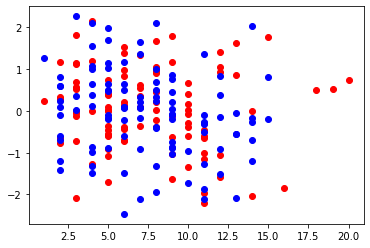

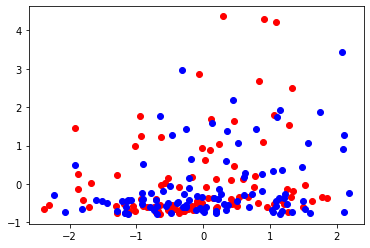

In [73]:
humans = train_y.ravel() == 1
bots = train_y.ravel() == 0
plt.scatter(train_X[humans, 1], train_X[humans, 3], c='red')
plt.scatter(train_X[bots, 1], train_X[bots, 3], c='blue')
plt.show()
plt.scatter(train_X[humans, 0], train_X[humans, 2], c='red')
plt.scatter(train_X[bots, 0], train_X[bots, 2], c='blue')

In [74]:
human = np.bitwise_or(np.bitwise_or(np.bitwise_or(test_X[:, 1] == 10, test_X[:,1] > 15), test_X[:, 1] == 3), np.bitwise_or((test_X[:, 2] >= 1), (test_X[:, 0] < -1.5)))
human

array([False, False,  True, False,  True, False, False, False,  True,
        True,  True, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True,  True, False, False])

In [75]:
from itertools import combinations
from tqdm import tqdm
import random
options = list(combinations(np.where(human)[0], 10))
random.seed(1)
random.shuffle(options)
for idxs in tqdm(options):
    f = ['0'] * 50
    for i in idxs:
        f[i] = '1'
    if submit_bits(''.join(f)):
        break

  0%|          | 204/92378 [01:20<10:07:13,  2.53it/s]

Nice work. The flag is 6C6S9bRFVU4W}BLMPF4eWoM14t0GTAaCuJO63tE6rVLRG{IZFWNH0Z14sUEBPT0Y29NO6H1dt7A5TIAXoXXRDLTdE9KWI2eY248OBYE7VA8YC16FYY3UMIVDNLMZBM9J
